Create a classifier to index the type of drug consummer by personality data. 

### Notes:
* This is a classification problem
* Data source: https://archive-beta.ics.uci.edu/ml/datasets/drug+consumption+quantified
* Steps:    
    1. Download the data
    2. Visualise the data
    3. (If needed) clean, normalise, transform and visualise the data to get a feeling about potential relationships between the variables
    4. Try to find the most relevant features (feature selection)
    5. Try to create new features
    6. Agree on a metric (i.e. Precision and recall)
    7. Develop a classification model (start with simple models and then grow in complexity)    
    8. Analyse the results for train + test data and compare different models

In [2]:
import pandas as pd

df = pd.read_csv('drug_consumption.csv')
df.columns = ['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'Semer', 'VSA']

df.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
1,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
2,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
3,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
4,6,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


In [3]:
df.drop('ID',axis=1,inplace=True)
df.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
1,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
2,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
3,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
4,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,1.63088,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1884 entries, 0 to 1883
Data columns (total 31 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        1884 non-null   float64
 1   Gender     1884 non-null   float64
 2   Education  1884 non-null   float64
 3   Country    1884 non-null   float64
 4   Ethnicity  1884 non-null   float64
 5   Nscore     1884 non-null   float64
 6   Escore     1884 non-null   float64
 7   Oscore     1884 non-null   float64
 8   Ascore     1884 non-null   float64
 9   Cscore     1884 non-null   float64
 10  Impulsive  1884 non-null   float64
 11  SS         1884 non-null   float64
 12  Alcohol    1884 non-null   object 
 13  Amphet     1884 non-null   object 
 14  Amyl       1884 non-null   object 
 15  Benzos     1884 non-null   object 
 16  Caff       1884 non-null   object 
 17  Cannabis   1884 non-null   object 
 18  Choc       1884 non-null   object 
 19  Coke       1884 non-null   object 
 20  Crack   

In [5]:
df['Alcohol'].value_counts()

CL5    758
CL6    505
CL4    287
CL3    198
CL2     68
CL1     34
CL0     34
Name: Alcohol, dtype: int64

In [6]:
temp = df.columns
temp = temp[12:]
for i in temp:
    df[i] = df[i].map({'CL0':0,'CL1':1,'CL2':2,'CL3':3,'CL4':4,'CL5':5,'CL6':6})


In [7]:
df.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,4,0,2,0,2,3,0,4,0,0
1,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,0,0,0,0,0,0,1,0,0,0
2,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,0,0,2,0,0,0,0,2,0,0
3,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,1,0,0,1,0,0,2,2,0,0
4,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,1.63088,...,0,0,0,0,0,0,0,6,0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1884 entries, 0 to 1883
Data columns (total 31 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        1884 non-null   float64
 1   Gender     1884 non-null   float64
 2   Education  1884 non-null   float64
 3   Country    1884 non-null   float64
 4   Ethnicity  1884 non-null   float64
 5   Nscore     1884 non-null   float64
 6   Escore     1884 non-null   float64
 7   Oscore     1884 non-null   float64
 8   Ascore     1884 non-null   float64
 9   Cscore     1884 non-null   float64
 10  Impulsive  1884 non-null   float64
 11  SS         1884 non-null   float64
 12  Alcohol    1884 non-null   int64  
 13  Amphet     1884 non-null   int64  
 14  Amyl       1884 non-null   int64  
 15  Benzos     1884 non-null   int64  
 16  Caff       1884 non-null   int64  
 17  Cannabis   1884 non-null   int64  
 18  Choc       1884 non-null   int64  
 19  Coke       1884 non-null   int64  
 20  Crack   

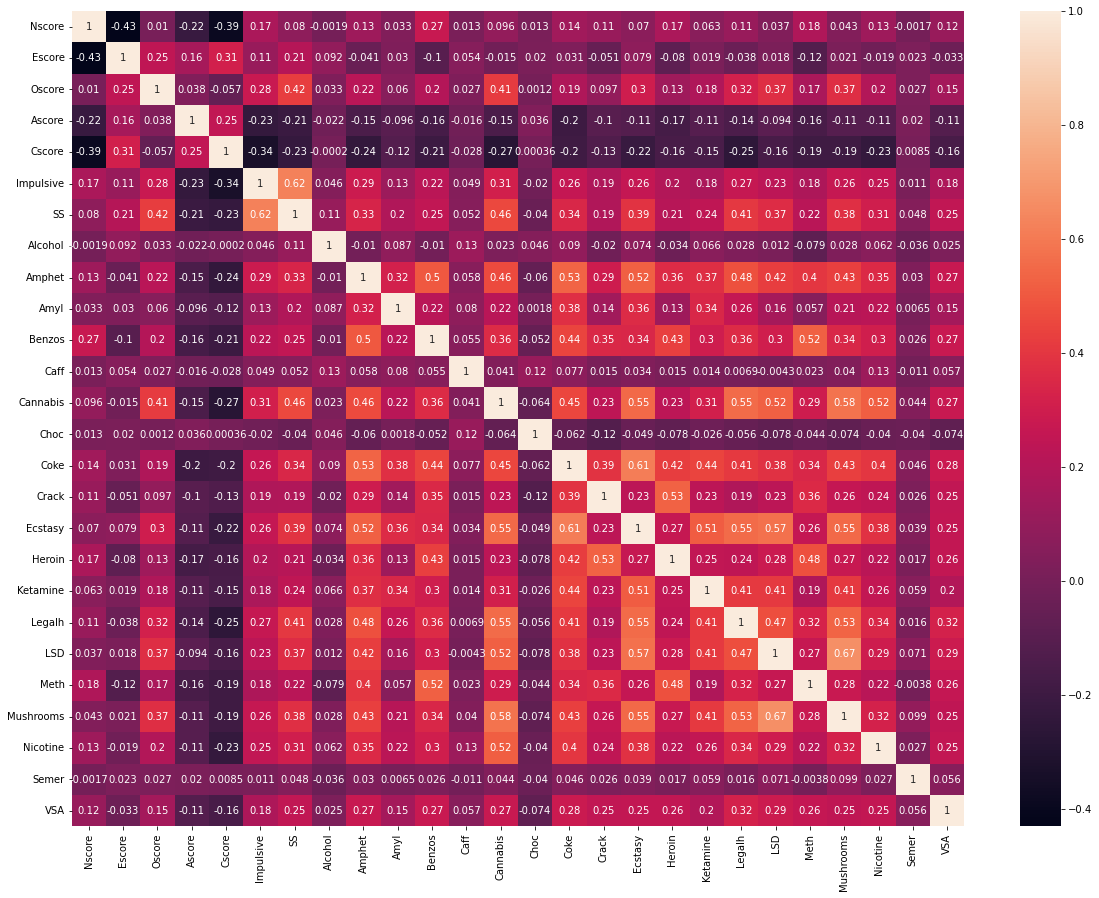

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,15))
sns.heatmap(df.drop(['Age','Gender','Education','Country','Ethnicity'],axis=1).corr(),annot=True)
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics

X = df.drop(temp, axis = 1)
y = df[temp]

print(X.shape, y.shape)

(1884, 12) (1884, 19)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1507, 12)
(1507, 19)
(377, 12)
(377, 19)


In [12]:
def evaluate(model):
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)

    print('model name', model)
    print ('accuracy', accuracy)

In [13]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn. ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# lr = LogisticRegression()
# svm = SVC()
dt = DecisionTreeClassifier(max_depth = 6)
rf = RandomForestClassifier(max_samples = 0.9)
knn = KNeighborsClassifier(n_neighbors = 5)

models = [dt, rf, knn]

for model in models:
    evaluate(model)

ValueError: multiclass-multioutput is not supported